# Decision Trees 

In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn import metrics

## Motivating Decision Trees

Random forests are an example of an *ensemble learner* built on decision trees.


Decision trees mimic human level thinking to classify or label objects: you can think of this model as breaking down the data by making a decision based on asking a series of questions.

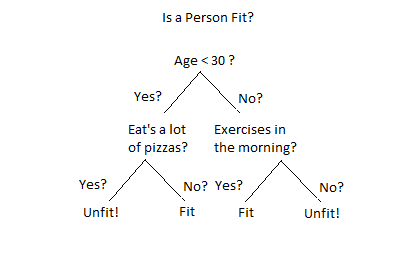

Decision Tree



In [29]:
from IPython.core.display import Image, display
display(Image(filename='dt.jpeg'))
print("Decision Tree\n")

The binary splitting makes this extremely efficient.
As always, though, the trick is to *ask the right questions*.
This is where the algorithmic process comes in: in training a decision tree classifier, the algorithm looks at the features and decides which questions (or "splits") contain the most information. In this technique , we split the population into two or more homogeneous sets based on the most significant splitter or the most informative feature. Here our objective function is to maximize the information gain at each split.

### Step 1: Creating a Data Samples

We'll start by randomly defining some two-dimensional labeled data:

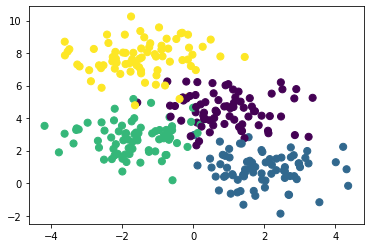

In [30]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis');

In [31]:
head_X=X[:10]
print(head_X)
print(X.shape)
head_y=y[:10]
print(head_y)
print(y.shape)

[[ 0.02458305  2.96215652]
 [-1.52392631  7.12573205]
 [ 1.27450825  5.63017322]
 [-0.86552334  7.80121774]
 [ 0.74874067  2.55579434]
 [ 4.35918422 -0.16235216]
 [-1.9957682   0.71644098]
 [ 1.70536064  4.43277024]
 [ 0.4906169   8.82985441]
 [-0.3529955   9.21042408]]
(300, 2)
[1 3 0 3 1 1 2 0 3 3]
(300,)


### Model Fitting



In [32]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Model Evaluation

In [33]:
y_pred0 =classifier.predict(X)
accuracy_score(y, y_pred0)

1.0

### Making a Prediction on a new Sample using a Trained tree

In [34]:
sample_1 = classifier.predict([[5, 6]])
print(sample_1)
sample_2 = classifier.predict([[10, 66]])
print(sample_2)
sample_3 = classifier.predict([[0.34, 2]])
print(sample_3)


sample_4_prob = classifier.predict_proba([[1, .5]])
print(sample_4_prob)

[0]
[3]
[1]
[[0. 1. 0. 0.]]


### Visualizing the Decision Boudary

We make a helper function that can plot the dataset and the decision boundary of a classifier. To find the boundary between the classes, as defined by a classifier, the algorithm will classify a large set of points, and find the points where the classifier's decision changes.

This code was adapted from an example in scikit-learn's documentation.https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html

In [35]:
def plot_decision_boundary(clf, X, Y, cmap='viridis'):
    h = 0.02
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k');

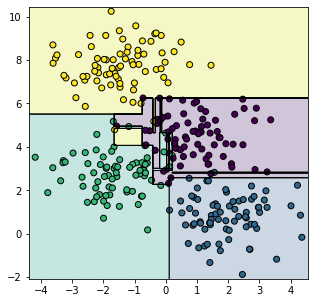

In [36]:
plot_decision_boundary(classifier, X, y)

### Decision Trees and over-fitting
One issue with decision trees is that it is very easy to create trees which over-fit the data. Decision-tree learners can create over-complex trees that do not generalize the data well. This is called overfitting. Over fitting is one of the most practical difficulty for decision tree models. This problem gets solved by setting constraints on model parameters and pruning.That is, they are flexible enough that they can learn the structure of the noise in the data rather than the signal! For example, take a look at two trees built on two subsets of this dataset:

In [37]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier(max_depth=3)
clf1.fit(X,y)


def plot_decision_boundary(clf, X, Y, cmap='viridis'):
    h = 0.02
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap);

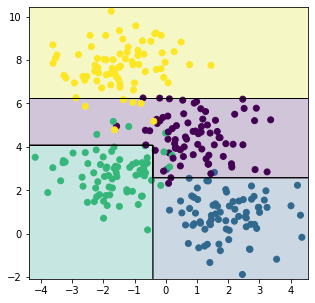

In [38]:
plot_decision_boundary(clf1, X, y)

In [39]:
y_pred1 =clf1.predict(X)
accuracy_score(y, y_pred1)

0.94

In [40]:
sample_1 = clf1.predict([[5, 6]])
print(sample_1)
sample_2 = clf1.predict([[10, 66]])
print(sample_2)
sample_3 = clf1.predict([[0.34, 2]])
print(sample_3)
sample_4 = clf1.predict([[1, .5]])
print(sample_4)

sample_4_prob = clf1.predict_proba([[1, .5]])
print(sample_4_prob)

[0]
[3]
[1]
[1]
[[0.01333333 0.97333333 0.01333333 0.        ]]


# Ensembles of Estimators: Random Forests

Decision tree are very sensitive to small variations in the training data and Over fitting. One possible way to address these is to use an **Ensemble Method**: this is a meta-estimator which essentially averages the results of many individual estimators which over-fit the data. The resulting estimates are much more robust and accurate than the individual estimates which make them up!It works on the concept of **Wisdom of the Crowd**.

One of the most common ensemble methods is the **Random Forest**, in which the ensemble is made up of many decision trees which are in some way perturbed.

In [41]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=0)
rnd_clf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [42]:
from sklearn.metrics import accuracy_score
y_pred2 = rnd_clf.predict(X)
accuracy_score(y, y_pred2)

0.9933333333333333

# Example: Classifying Digits


In [43]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

### Understanding the dataset

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping 

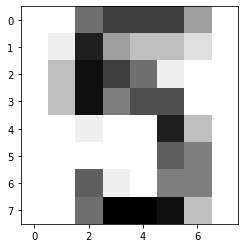

In [44]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [45]:
X = digits.data
y = digits.target
print(X[0])
print(y[0])
print(X.shape)
print(y.shape)

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
0
(1797, 64)
(1797,)


In [46]:
def plot_multi(i):
    '''Plots 16 digits, starting with digit i'''
    nplots = 16
    fig = plt.figure(figsize=(7,7))
    for j in range(nplots):
        plt.subplot(4,4,j+1)
        plt.imshow(digits.images[i+j], cmap='binary')
        plt.title(digits.target[i+j])
        plt.axis('off')
    plt.show()

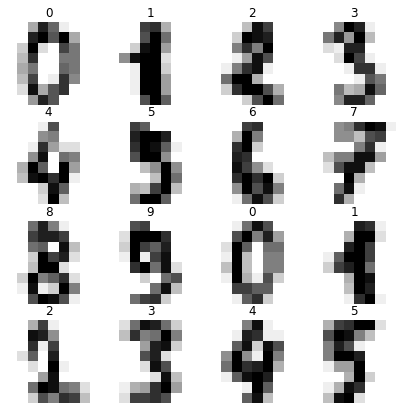

In [47]:
plot_multi(0)

### Fitting a Model

In [48]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
clf = DecisionTreeClassifier(max_depth=11)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

### Check the accuracy 

In [49]:
score=metrics.accuracy_score(ypred, ytest)
print(score)

0.8311111111111111


### Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. In this section, I am just showing two python packages (Seaborn and Matplotlib) for making confusion matrices.

In [50]:
cm = metrics.confusion_matrix(ypred, ytest)
print(cm)

[[34  0  1  0  2  0  0  3  0  0]
 [ 0 37  2  0  2  0  1  0  6  0]
 [ 0  2 36  5  0  0  0  1  0  0]
 [ 2  1  2 35  0  4  2  2  3  2]
 [ 1  1  1  0 33  0  0  0  0  1]
 [ 0  0  0  0  0 42  0  1  3  5]
 [ 0  0  1  0  0  0 49  0  0  0]
 [ 0  0  0  1  0  0  0 35  0  0]
 [ 0  1  1  1  0  1  0  2 34  0]
 [ 0  1  0  3  1  1  0  4  2 39]]


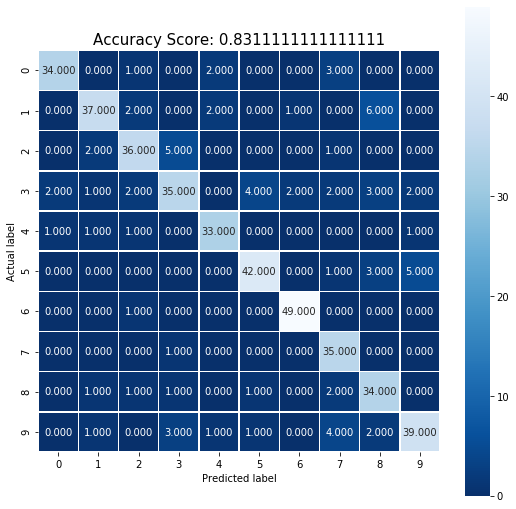

In [51]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### Exercise
1. Repeat the Digit classification task with ``sklearn.ensemble.RandomForestClassifier``.  How does the ``max_depth``, ``max_features``, and ``n_estimators`` affect the results?
2. Try this classification with ``sklearn.svm.SVC``, adjusting ``kernel``, ``C``, and ``gamma``. Which classifier performs optimally?
3. Try a few sets of parameters for each model and check the F1 score (``sklearn.metrics.f1_score``) on your results. What's the best F1 score you can reach?

https://github.com/parthvadhadiya/Digit-Recognition-using-SK-Learn/blob/master/MNIST.ipynb